# Esame 1 - Esercizio 2

**2. I dati qui a fianco riportano misurazioni fisiologiche, scelte di stile di vita e marcatori biochimici, che si ipotizza siano fortemente correlati con l’età. Questo dataset viene usato in tutti gli esercizi restanti del compito.**

Descrizione delle variabili:
group gruppo di età (senior/non-senior)
age età
gender sesso
PA Se il soggetto svolge, nella settimana tipica, attività sportive, di fitness o ricreative di intensità moderata o vigorosa
BMI Body Mass Index
GLU Glucosio nel sangue da digiuno
diabetic Diabetico (1 sì, 2 no, 3 incerto)
GLT Glucosio orale
insulin Livello di insulina

**2.1 Studiare la distribuzione delle diverse variabili, sia univariata, sia bivariata, alla ricerca di outliers e altri difetti. Si scelgano opportune trasformazioni per facilitare questo compito e per ottenere migliori risultati negli esercizi seguenti.**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
base = pd.read_excel("inml25tst01.xlsx", sheet_name="Es 2")

In [31]:
print(base.columns)
df = base.drop(columns=base.columns[0:9])
df = df.set_index(["id"])
print(df.columns)

Index(['2. I dati qui a fianco riportano misurazioni fisiologiche, scelte di stile di vita e marcatori biochimici, che si ipotizza siano fortemente correlati con l’età.\nQuesto dataset viene usato in tutti gli esercizi restanti del compito.\nDescrizione delle variabili:\ngroup gruppo di età (senior/non-senior)\nage età\ngender sesso\nPA Se il soggetto svolge, nella settimana tipica, attività sportive, di fitness o ricreative di intensità moderata o vigorosa\nBMI Body Mass Index\nGLU Glucosio nel sangue da digiuno\ndiabetic Diabetico (1 sì, 2 no, 3 incerto)\nGLT Glucosio orale\ninsulin Livello di insulina',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'id', 'group', 'age',
       'gender', 'PA', 'BMI', 'GLU', 'diabetic', 'GLT', 'insulin'],
      dtype='object')
Index(['group', 'age', 'gender', 'PA', 'BMI', 'GLU', 'diabetic', 'GLT',
       'insulin'],
      dtype='object')


In [32]:
print(df.info())
print(df["group"].unique())
df = pd.get_dummies(df, "group", dtype=int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2278 entries, 1 to 2278
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   group     2078 non-null   object 
 1   age       2078 non-null   float64
 2   gender    2278 non-null   int64  
 3   PA        2278 non-null   int64  
 4   BMI       2278 non-null   float64
 5   GLU       2278 non-null   int64  
 6   diabetic  2278 non-null   int64  
 7   GLT       2278 non-null   int64  
 8   insulin   2278 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 178.0+ KB
None
['Adult' 'Senior' nan]
<class 'pandas.core.frame.DataFrame'>
Index: 2278 entries, 1 to 2278
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2078 non-null   float64
 1   gender        2278 non-null   int64  
 2   PA            2278 non-null   int64  
 3   BMI           2278 non-null   float64
 4   GLU          

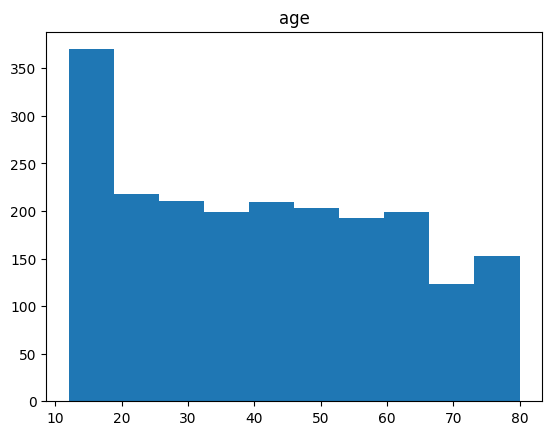

In [45]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    break # debug only

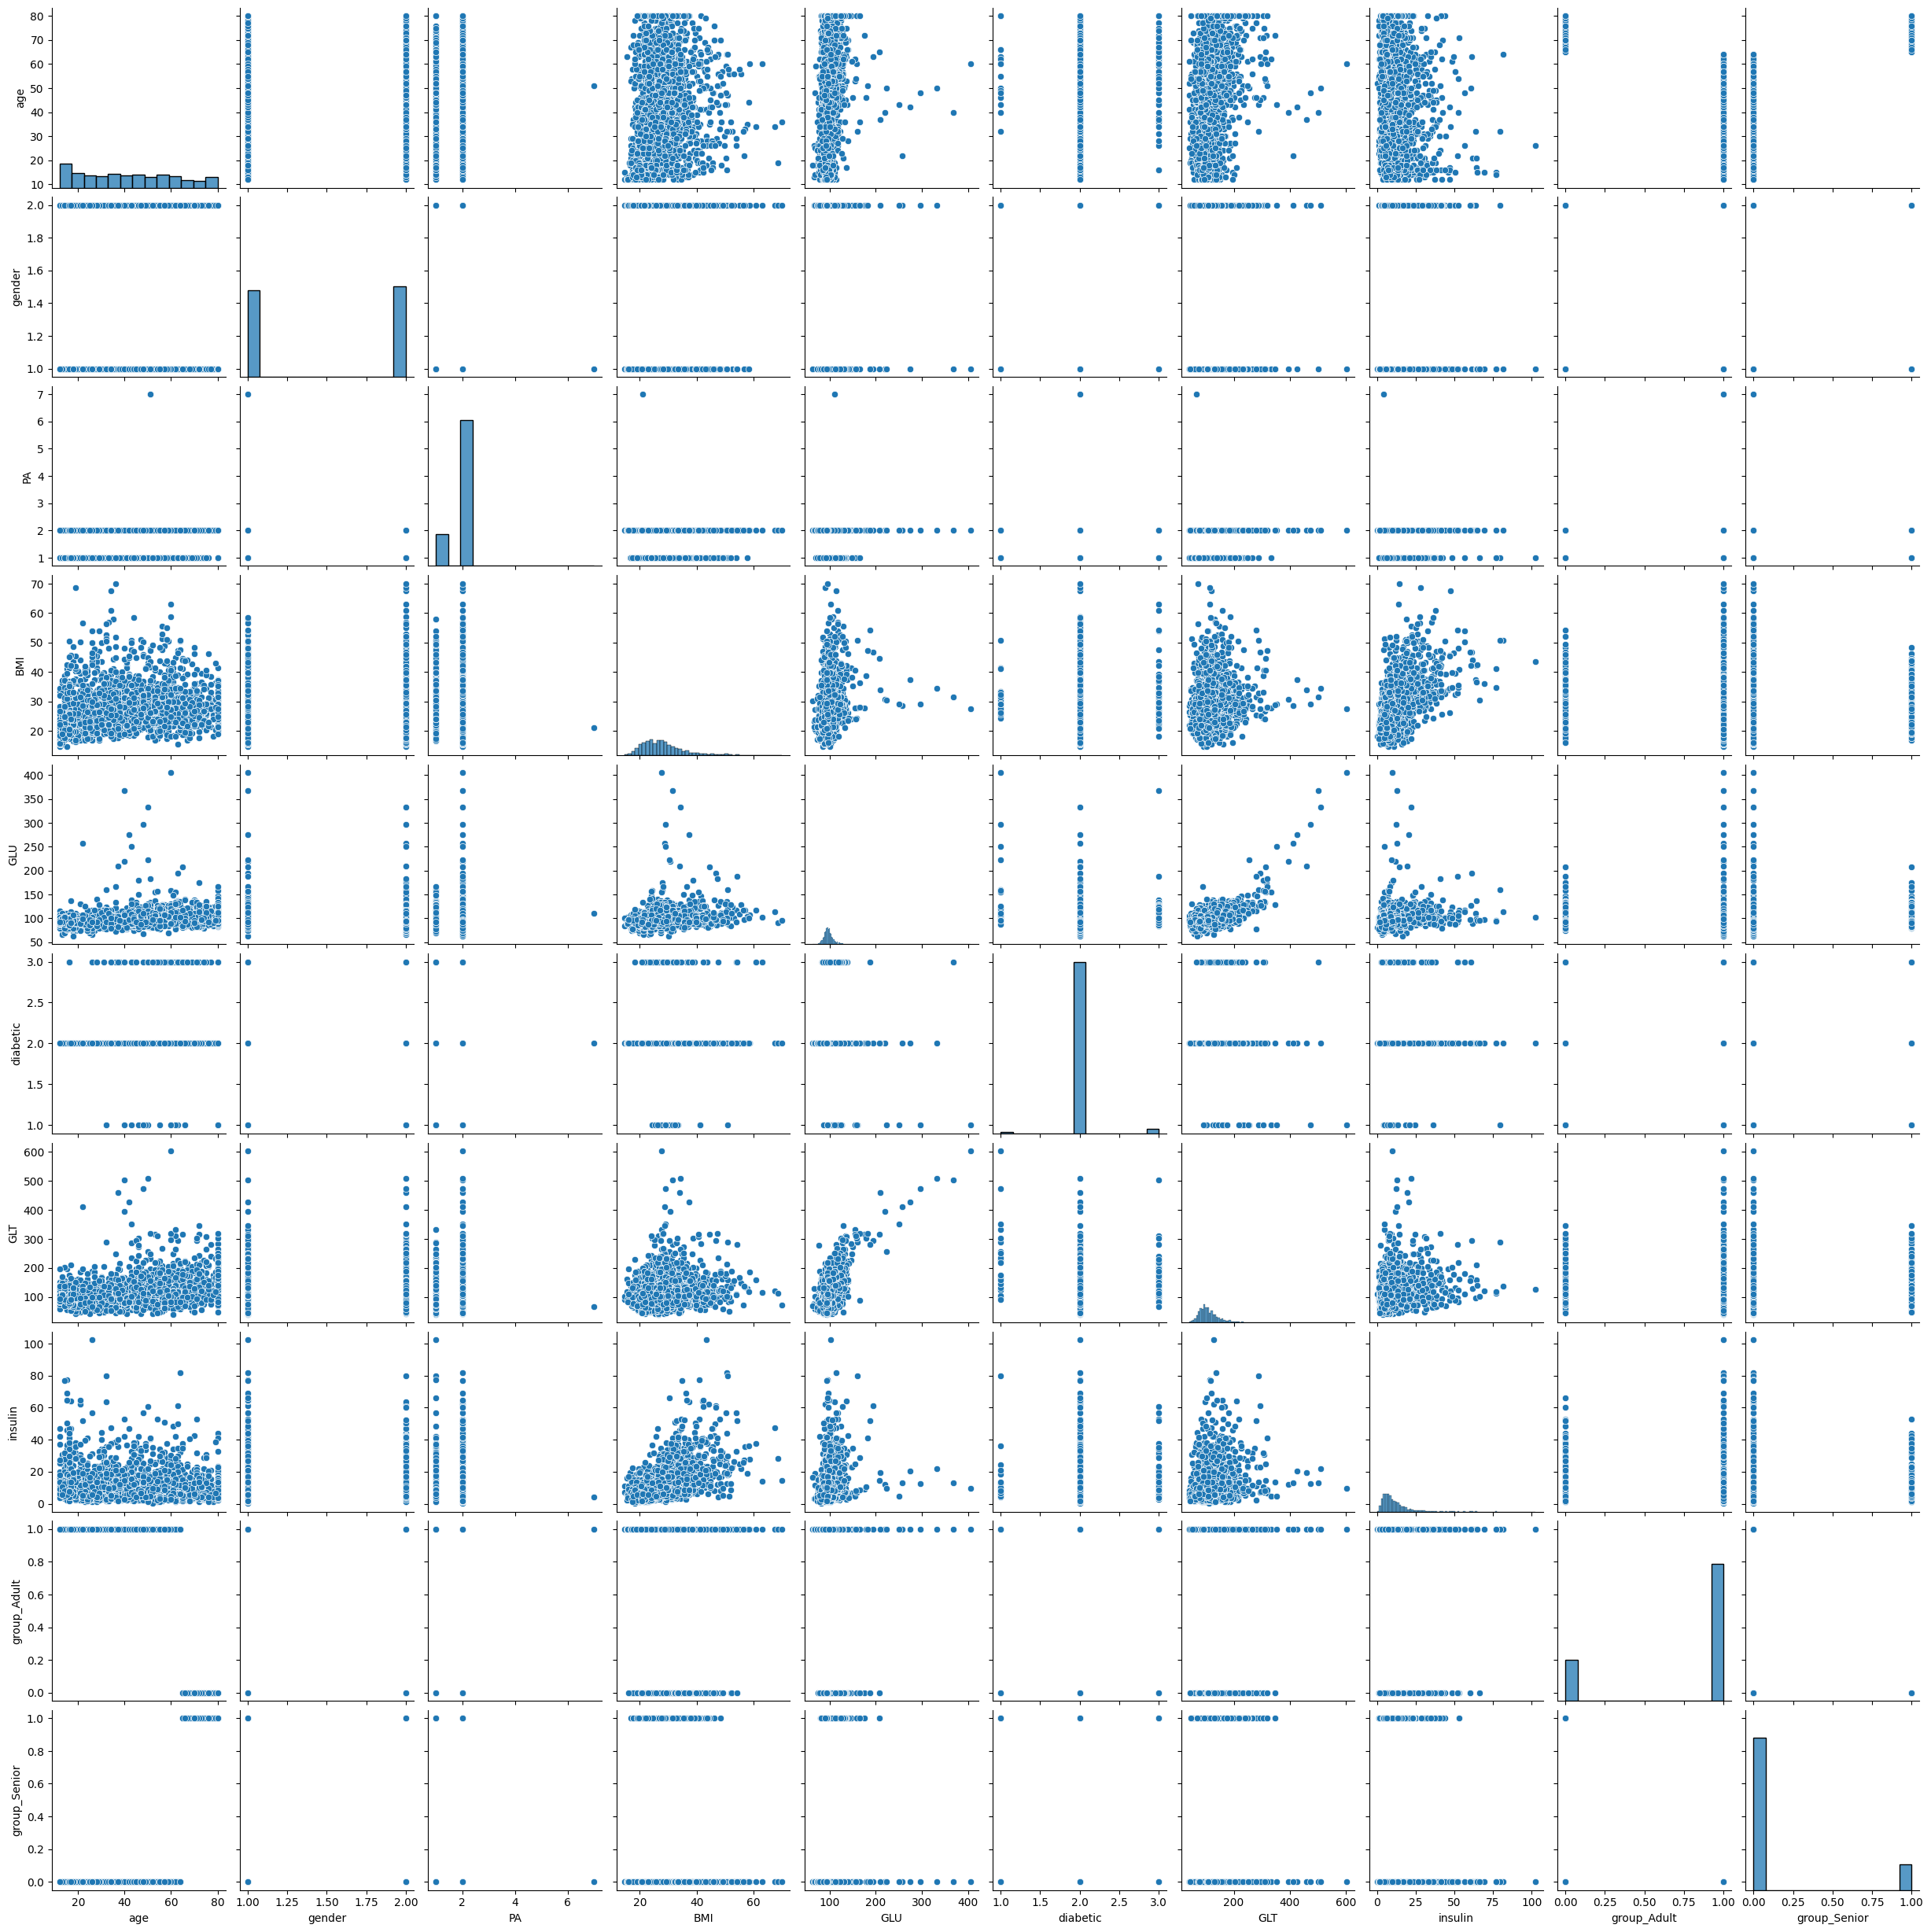

In [34]:
sns.pairplot(df)
plt.show()

---

### Esempio di anomalia trovata

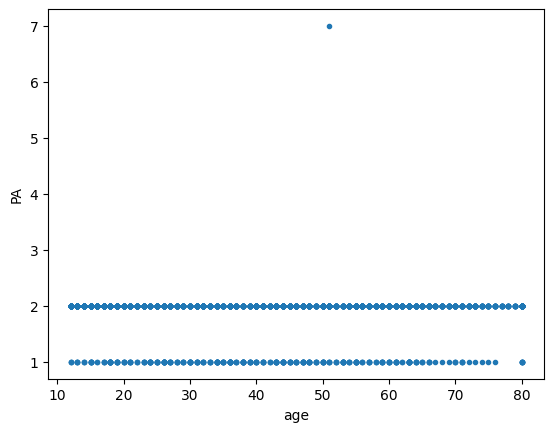

In [35]:
plt.plot(df["age"], df["PA"], ".")
plt.xlabel("age")
plt.ylabel("PA")
plt.show()

In [36]:
outlier = df[df["PA"] == 7]
df.drop(index=outlier.index, inplace=True)


---

**2.2 Eseguire una PCA delle variabili da L a S. Quante componenti conviene tenere?
Descrivere qualitativamente il significato delle prime componenti.**

In [37]:
from sklearn.decomposition import PCA

In [38]:
print(df.shape)

df_train = df[df["age"].isna() != True]
df_test = df[df["age"].isna()]

print(df_train.shape)
print(df_test.shape)

(2277, 10)
(2077, 10)
(200, 10)


In [39]:
df_train = df_train - df_train.mean()
df_test = df_test - df_test.mean()

In [40]:
pca = PCA()
pca.fit(df_train)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


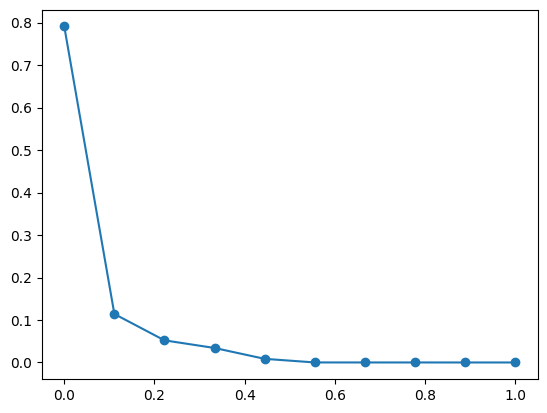

In [41]:
x = np.linspace(0,1, df_train.shape[1])
y = pca.explained_variance_ratio_

plt.plot(x,y)
plt.scatter(x, y)
plt.show()

In [42]:
thr = 0.9
summ = 0
k = 0

for v_ratio in pca.explained_variance_ratio_:
    summ += v_ratio
    k += 1

    if summ >= thr: break

print(summ)
print(k)

0.9050591901248333
2


In [43]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=df_train.columns)
loadings_df

,0,1,2,3,4,5,6,7,8,9
age,0.149467,0.982362,0.030367,0.071332,-0.079321,0.000377,-0.012669,0.012654,-0.000773,-8.189253e-20
gender,0.000087,0.000353,-0.007604,0.002312,0.010518,0.959367,-0.206288,-0.191365,0.016317,-2.973482e-19
PA,0.000531,-0.000115,-0.002723,0.000352,-0.004322,0.281361,0.691982,0.664798,0.003776,4.255316e-17
BMI,0.030699,0.022993,0.113314,0.516372,0.847839,-0.007767,0.012016,-0.003536,-0.000418,-2.738812e-18
GLU,0.272446,-0.057854,0.940743,-0.192546,-0.016719,0.008135,0.002002,-0.001913,0.000806,9.080420e-18
diabetic,0.000029,0.000531,-0.000385,0.001406,-0.000392,-0.016760,-0.004472,0.006064,0.999830,1.237927e-16
GLT,0.949014,-0.133745,-0.284926,-0.010398,0.013671,-0.002579,-0.001096,0.000378,-0.000097,-2.785639e-18
insulin,0.043079,-0.113648,0.141360,0.831313,-0.523560,0.003886,-0.005553,0.000824,-0.001226,-1.056133e-18
group_Adult,-0.001952,-0.011924,0.002121,0.000072,0.009093,-0.003307,-0.489002,0.510495,-0.005328,7.071068e-01
group_Senior,0.001952,0.011924,-0.002121,-0.000072,-0.009093,0.003307,0.489002,-0.510495,0.005328,7.071068e-01


In [44]:
loadings_df = loadings_df >= loadings_df.mean()
loadings_df

,0,1,2,3,4,5,6,7,8,9
age,True,True,False,False,False,False,False,False,False,False
gender,False,False,False,False,False,True,False,False,False,False
PA,False,False,False,False,False,True,True,True,False,False
BMI,False,False,True,True,True,False,False,False,False,False
GLU,True,False,True,False,False,False,False,False,False,False
diabetic,False,False,False,False,False,False,False,False,True,False
GLT,True,False,False,False,False,False,False,False,False,False
insulin,False,False,True,True,False,False,False,False,False,False
group_Adult,False,False,False,False,False,False,False,True,False,True
group_Senior,False,False,False,False,False,False,True,False,False,True
